Standardization

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=df.iloc[ : , 2: ]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:
df.sample(10)

,Age,EstimatedSalary,Purchased
144,34,25000,0
369,54,26000,1
232,40,107000,1
17,45,26000,1
133,21,68000,0
244,41,72000,0
127,26,32000,0
64,59,83000,0
304,40,60000,0
112,38,61000,0


In [17]:
x=df.drop("Purchased",axis=1)
y=df['Purchased']

Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

STANDARD SCALAR

In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)# fit the tain set , it will learn the parameters

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [32]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns) # cz X_train scaled values for in numpy array .
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [34]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [36]:
np.round(X_train_scaled.describe(),2) # its a scaled value

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


EFFECT OF SCALING 

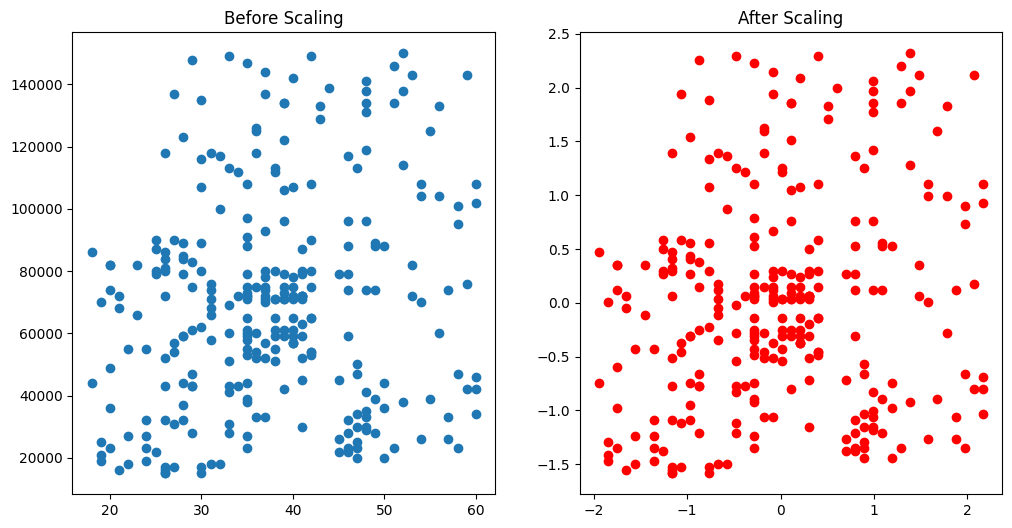

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

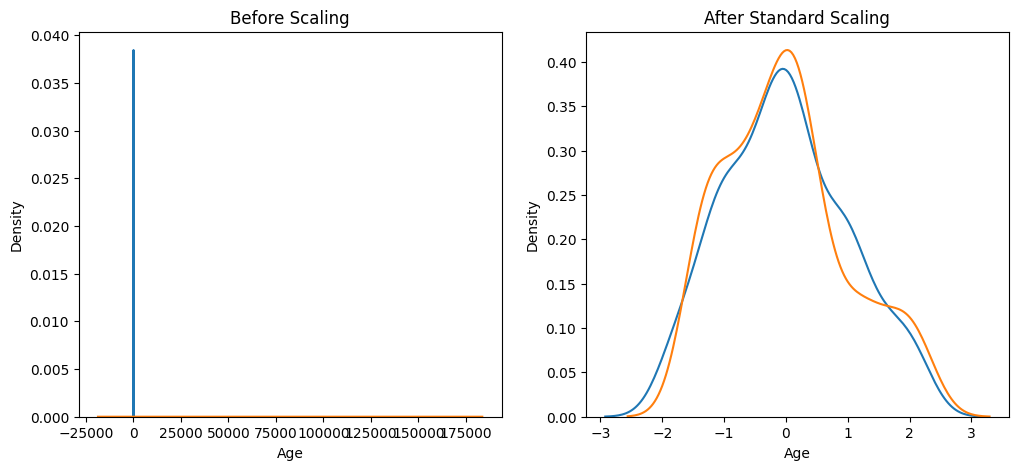

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

COMAPRITION AFTER DISRIBUTION

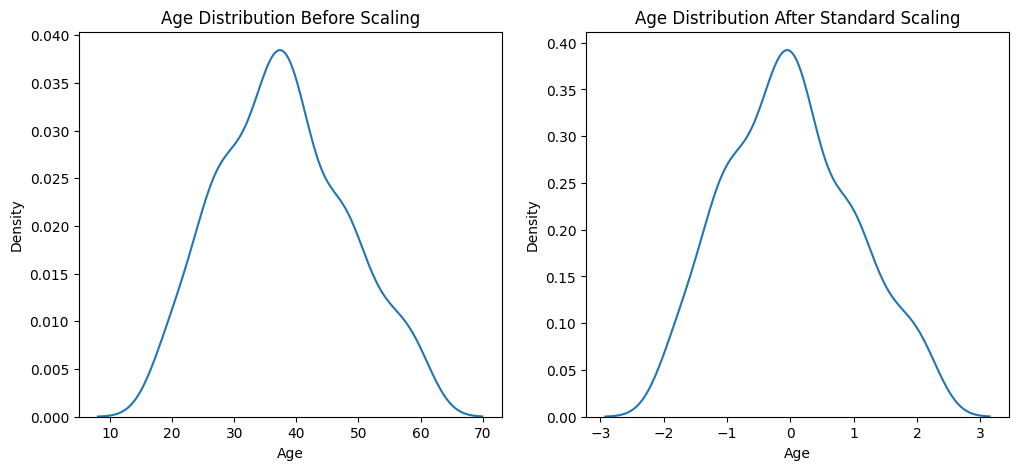

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

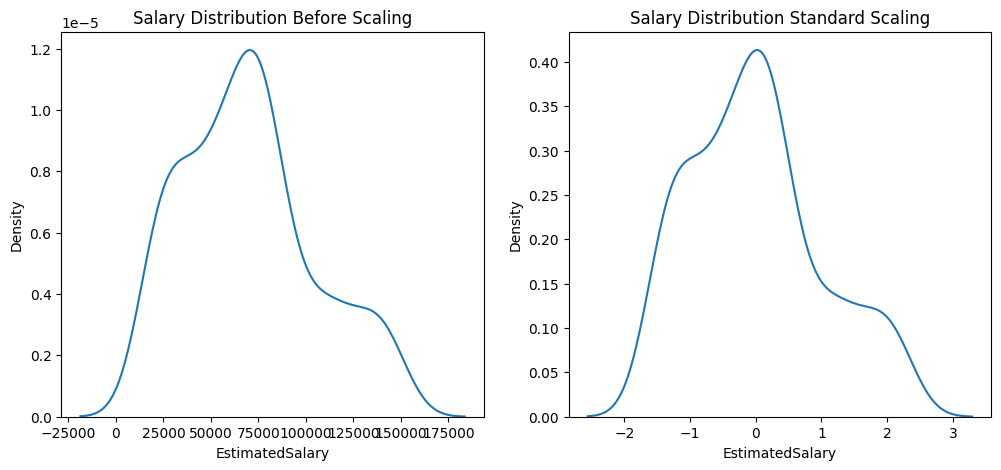

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

why Scaling is Important